In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# loading the dataset into notebook
df = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')

In [13]:
# taking a quick little glance at the dataset
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [14]:
# describing the data
df.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.456714e+06,1.456714e+06,1.456714e+06,1.456713e+06,1.456700e+06,1.456674e+06,1.419631e+06,1.419631e+06,1.456714e+06,1.419631e+06,1.419631e+06
mean,3.308606e+06,9.597550e+06,1.150644e+03,1.125920e+01,2.287027e+01,3.745632e+01,1.164398e+06,1.885523e+06,2.013897e+03,4.184147e+01,-8.767224e+01
std,1.235350e+06,8.083505e+05,6.916466e+02,6.904691e+00,1.380589e+01,2.144029e+01,1.850835e+04,3.424775e+04,1.449584e+00,9.430126e-02,6.661726e-02
min,3.000000e+00,2.022400e+04,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.012000e+03,3.661945e+01,-9.168657e+01
25%,2.698636e+06,9.002709e+06,6.130000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152544e+06,1.858762e+06,2.013000e+03,4.176787e+01,-8.771528e+01
50%,3.063654e+06,9.605776e+06,1.024000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166021e+06,1.891502e+06,2.014000e+03,4.185797e+01,-8.766613e+01
75%,3.428849e+06,1.022577e+07,1.711000e+03,1.700000e+01,3.400000e+01,5.600000e+01,1.176363e+06,1.908713e+06,2.015000e+03,4.190529e+01,-8.762813e+01
max,6.253474e+06,1.082788e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951573e+06,2.017000e+03,4.202271e+01,-8.752453e+01


In [15]:
# checking the data types
df.dtypes

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [16]:
# dataset size
df.shape

(1456714, 23)

In [17]:
# sorting between types of features
# i didn't want to do just categorical and numerical, since there were coordinates and date/time features

categorical = df[['Block','Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'FBI Code']]
numerical = df[['IUCR', 'Ward', 'District', 'Beat', 'Community Area', 'Year']]
dates = df[['Date', 'Updated On']]
locations = df[['Latitude', 'Longitude', 'Location']]

In [32]:
# getting just the counts for each column in 'categorical', since the visualizations are a little bit hard to look at
for feature in categorical.columns:
    
    counts = categorical[feature].value_counts()
    print(f'\n{counts}')


Block
001XX N STATE ST         3634
0000X W TERMINAL ST      2746
008XX N MICHIGAN AVE     2465
076XX S CICERO AVE       2116
0000X N STATE ST         1844
                         ... 
0000X S B2 ST               1
021XX N Southport Ave       1
018XX W FERDINAND ST        1
038XX N PARKVIEW TER        1
000XX W 79TH ST             1
Name: count, Length: 32774, dtype: int64

Primary Type
THEFT                                329460
BATTERY                              263700
CRIMINAL DAMAGE                      155455
NARCOTICS                            135240
ASSAULT                               91289
OTHER OFFENSE                         87874
BURGLARY                              83397
DECEPTIVE PRACTICE                    75495
MOTOR VEHICLE THEFT                   61138
ROBBERY                               57313
CRIMINAL TRESPASS                     36912
WEAPONS VIOLATION                     17233
PUBLIC PEACE VIOLATION                13122
OFFENSE INVOLVING CHILDREN          

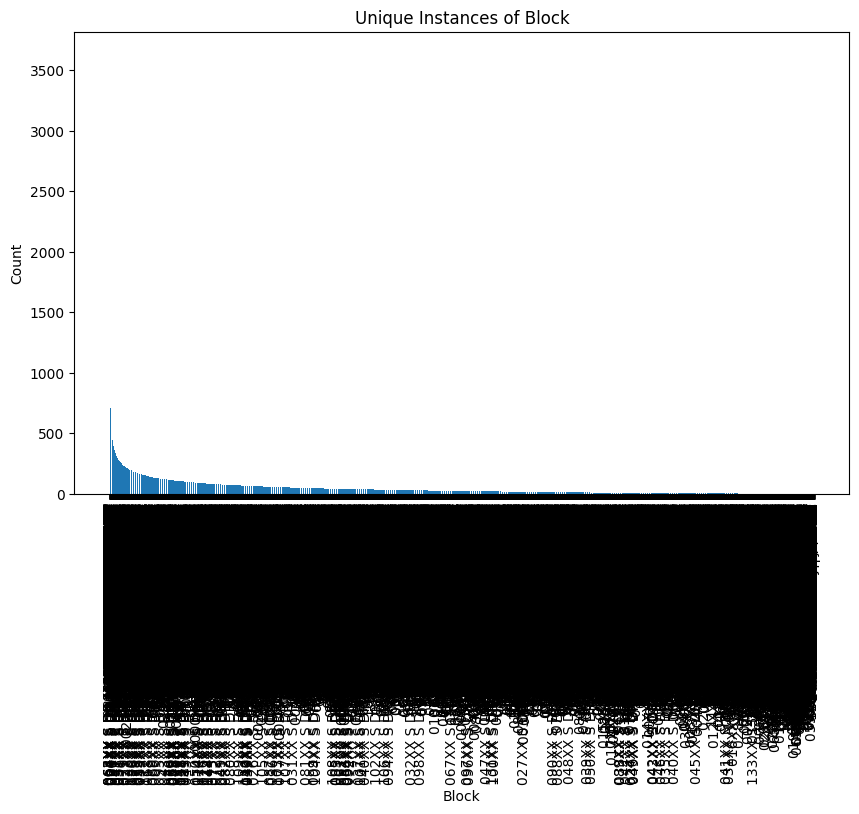

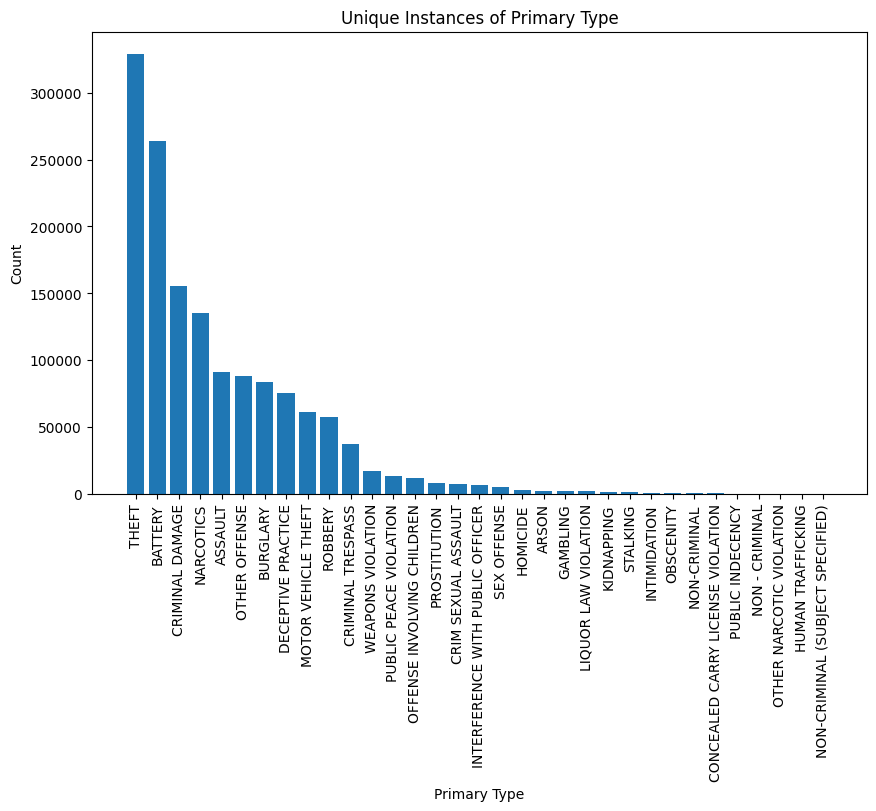

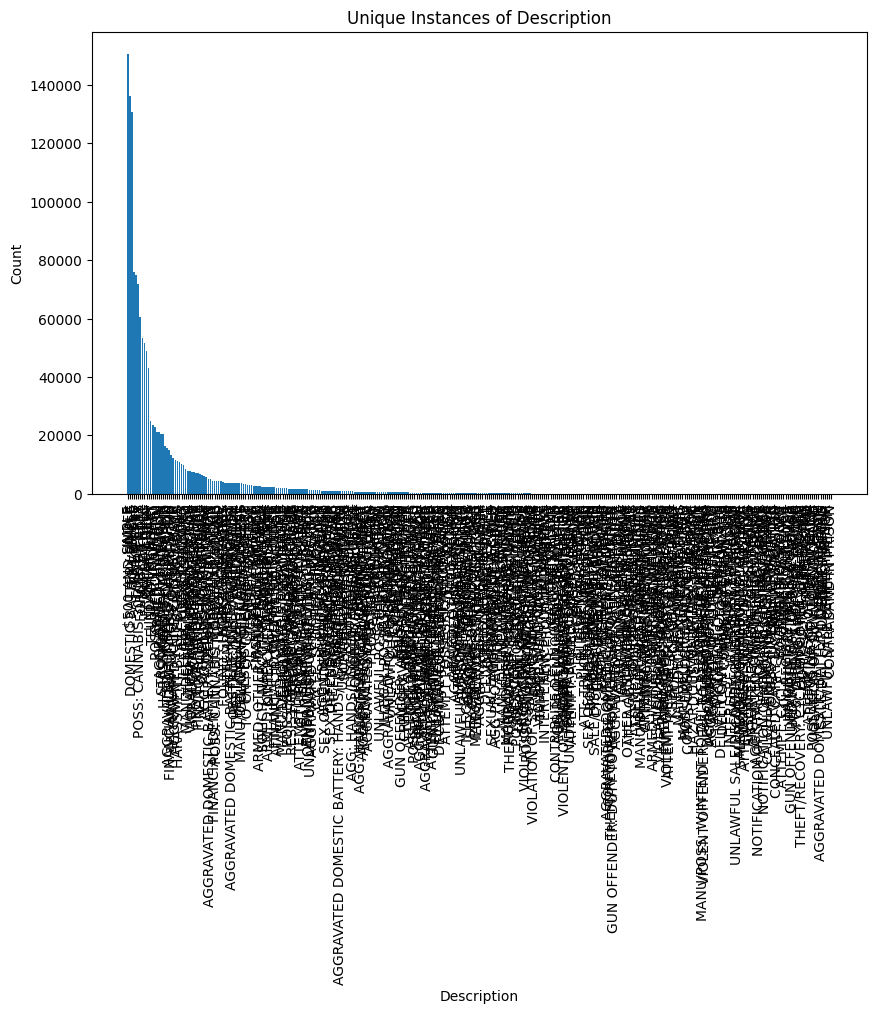

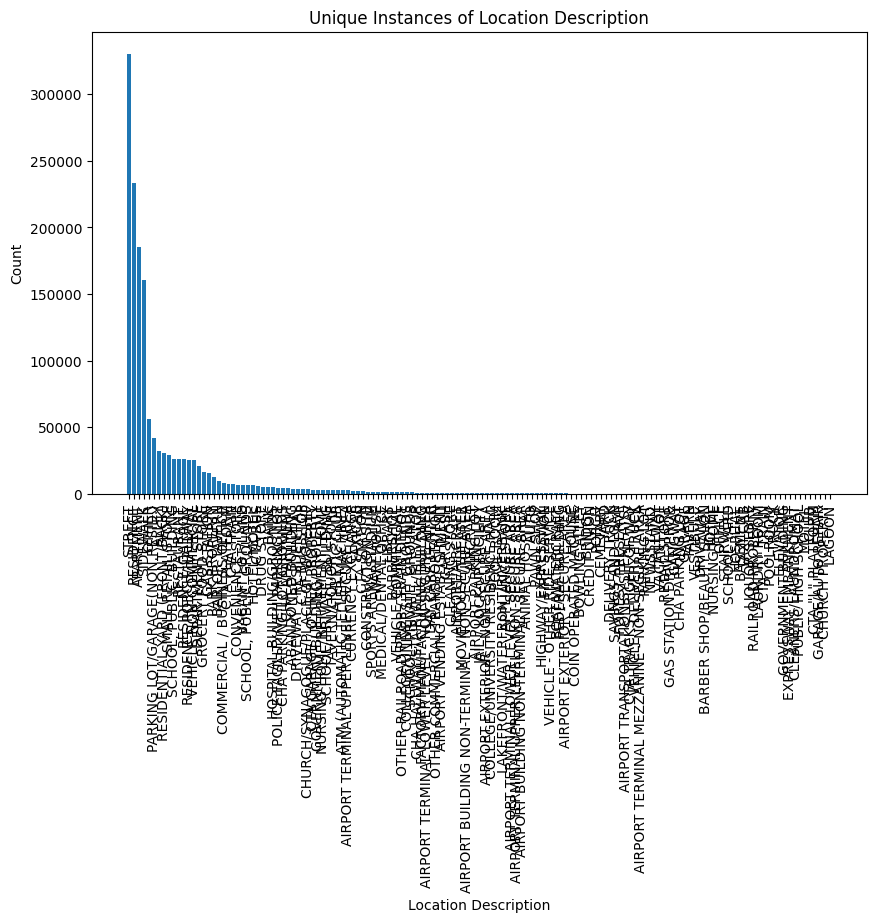

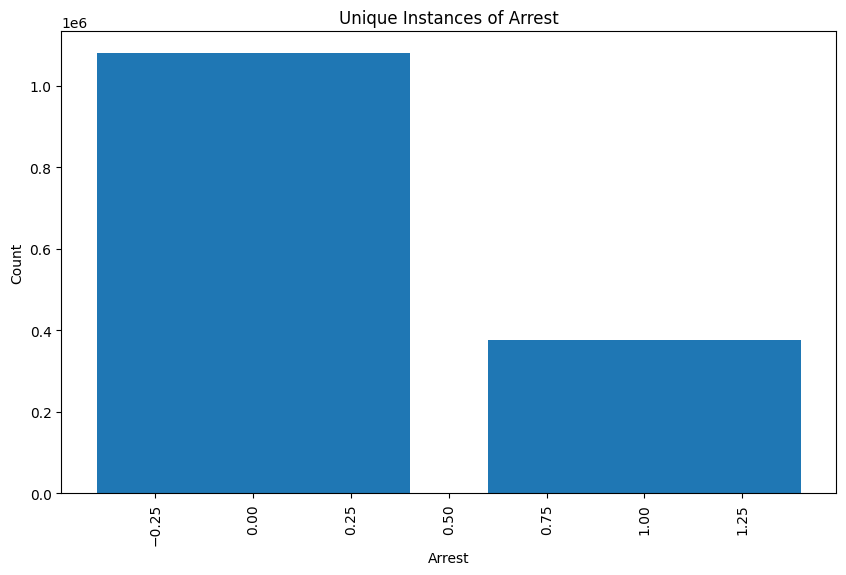

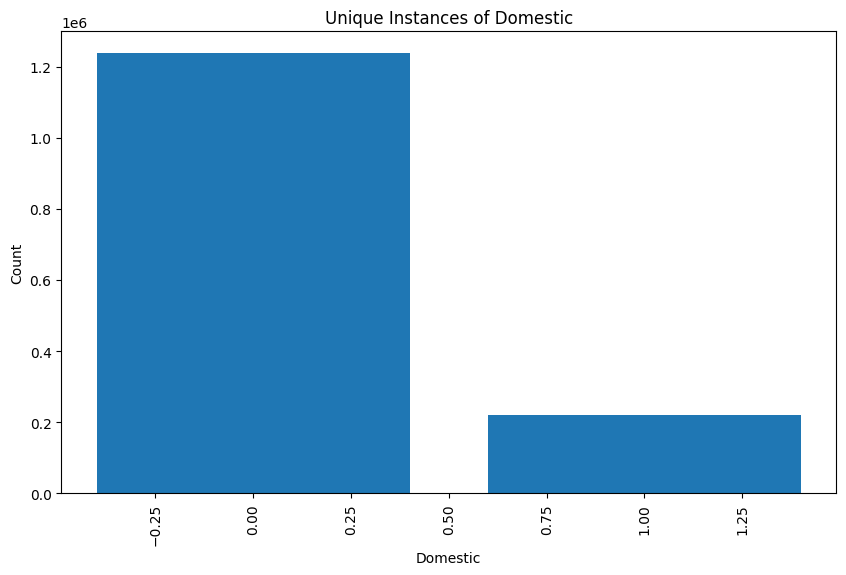

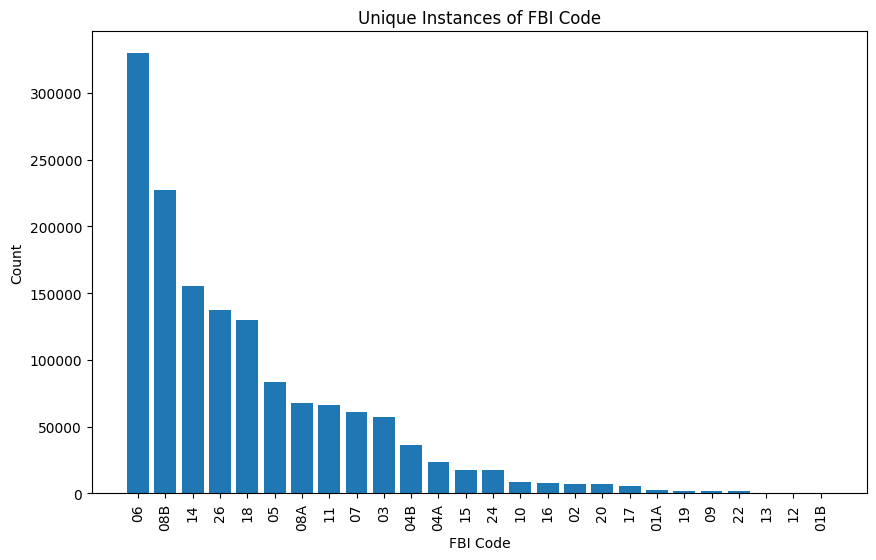

In [22]:
# counting each unique instance within the categorical features and printing them as tables
# this looks really ugly, i'm trying to work on making the initial visualizations a lot better :P

for feature in categorical.columns:
    
    counts = categorical[feature].value_counts()
    
    plt.figure(figsize=(10, 6))
    plt.bar(counts.index, counts.values)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Unique Instances of {feature}')
    plt.xticks(rotation=90)
    plt.show()

In [31]:
# this is getting the counts for all of the numerical features, and printing them, so they're a litlte bit easier to see
# it's still a bit tedious working through it

for feature in numerical.columns:
    
    counts = numerical[feature].value_counts()
    print(f'\n{counts}')


IUCR
0820    136036
0486    130700
0460     88069
0810     74906
1320     72515
         ...  
1574         1
142B         1
1531         1
2251         1
3770         1
Name: count, Length: 365, dtype: int64

Ward
28.0    71667
42.0    66836
24.0    63730
2.0     56919
27.0    51640
17.0    49478
6.0     48471
20.0    44981
21.0    44830
8.0     40278
16.0    39798
7.0     39721
34.0    39504
37.0    38674
15.0    38182
3.0     38032
9.0     37292
29.0    35151
5.0     35037
1.0     26280
10.0    25967
4.0     24613
18.0    24240
32.0    23934
44.0    23059
26.0    22298
25.0    20472
14.0    20151
31.0    20142
30.0    20109
11.0    19538
46.0    19459
49.0    19053
13.0    18666
43.0    18645
12.0    18080
35.0    17963
23.0    17381
22.0    17135
41.0    16849
38.0    15570
45.0    15282
36.0    14814
50.0    14627
40.0    14515
47.0    14215
33.0    13844
39.0    13672
48.0    13235
19.0    12671
Name: count, dtype: int64

District
11.0    102878
8.0      96325
6.0      86915
4.0

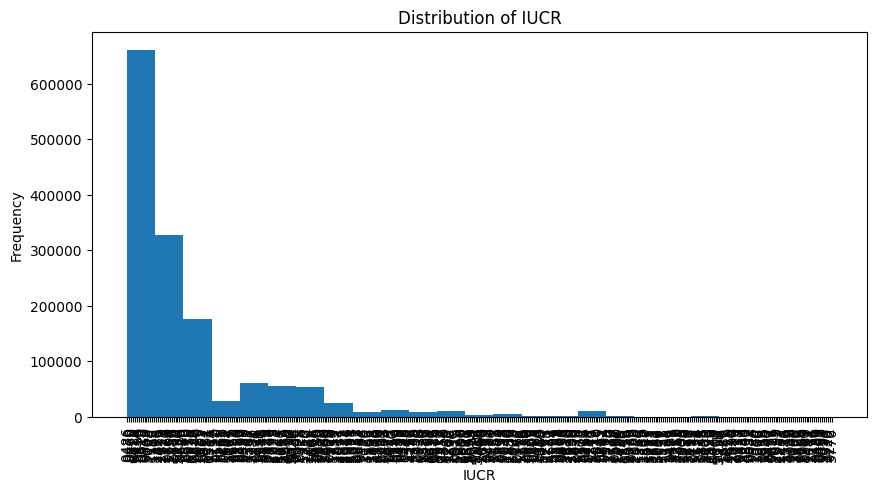

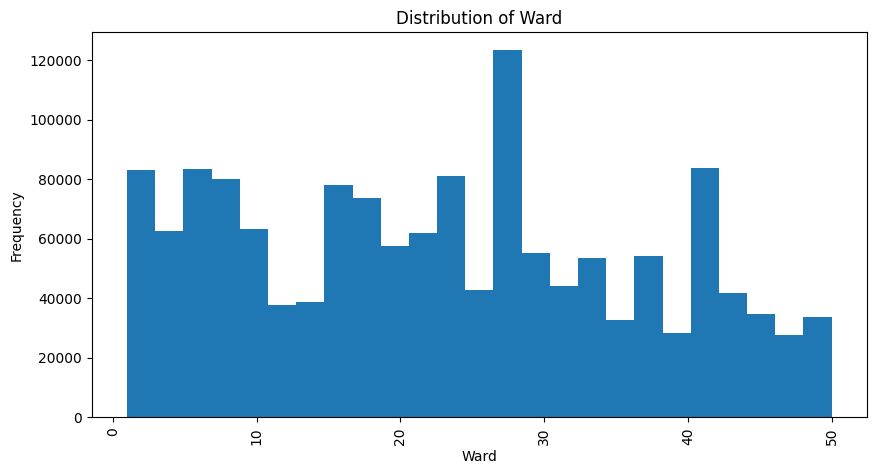

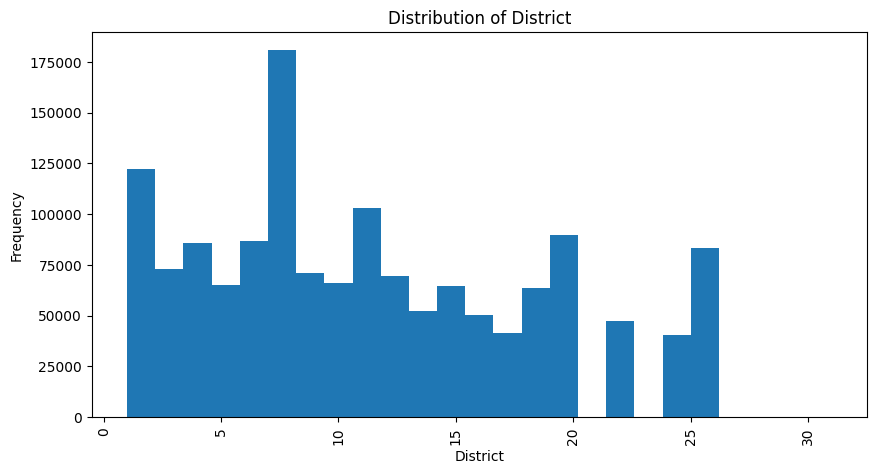

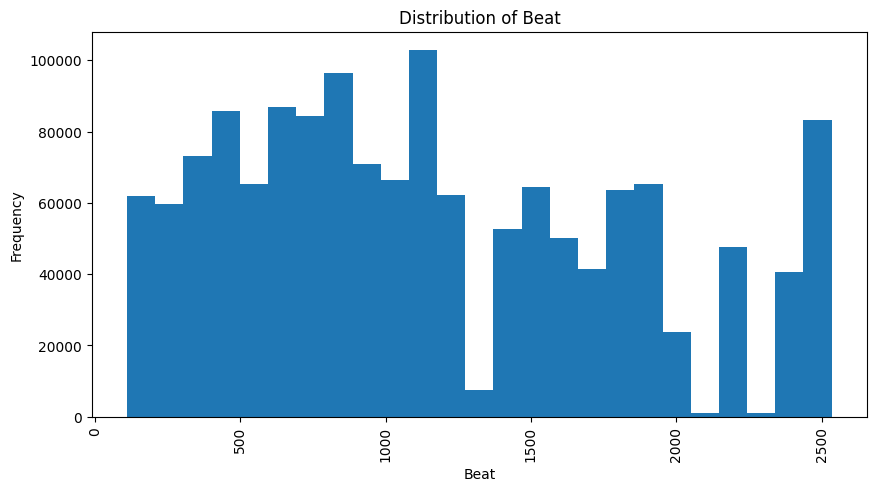

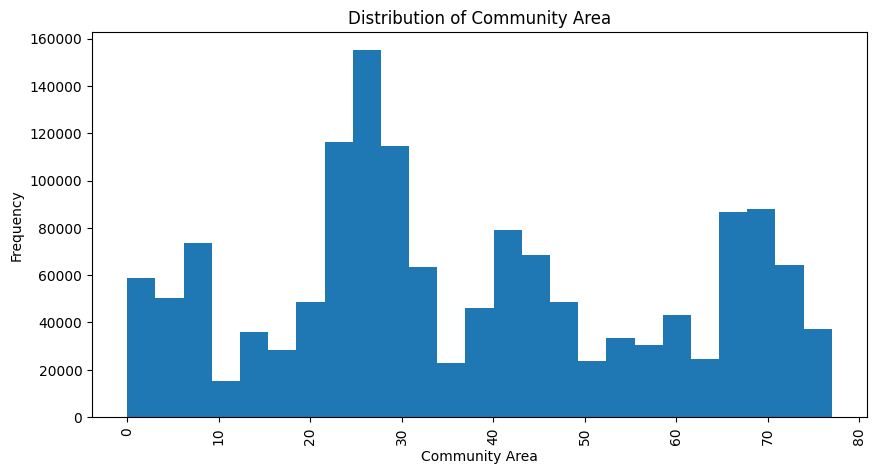

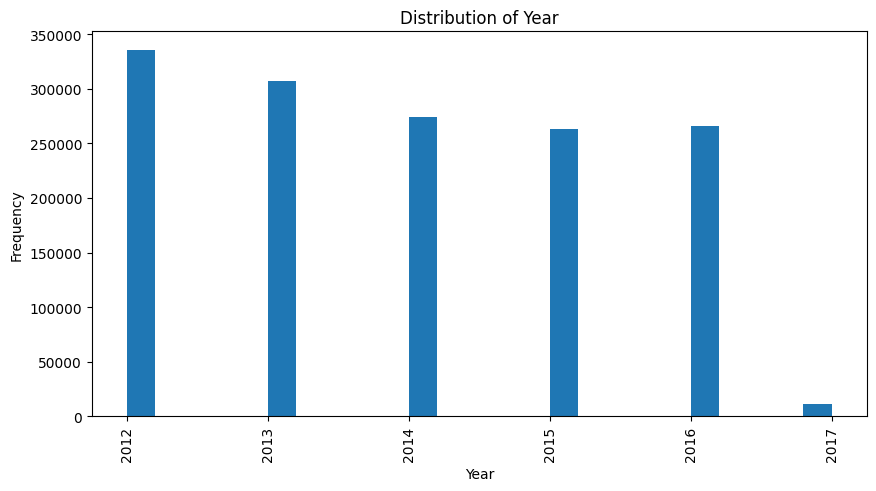

In [27]:
# histogramming each feature in the numerical category
# these visualizations also have the same problem w/ really ugly x-axis tick names, but i think they can be fixed
# some of the uglier features are redundant, or measure the same thing

for col in numerical:
    plt.figure(figsize=(10, 5)) 
    plt.hist(df[col], bins=25)  # Adjust 'bins' as needed
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show